<a href="https://colab.research.google.com/github/Manal-art-coder/DataScientest_Project/blob/main/Notebook_commun_final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédiction du succès d'une campagne Marketing


## I- Contexte et objectif

Objectif: Afin de réduire les couts et de réussir sa campagne Marketing, une banque souhaite construire un modèle capable de prédir lesquels de ses clients sont plus susceptibles de souscrir à un compte dépôt à terme.

La variable étant la souscription ou non au compte à terme, nous utiliserons l'apprentissage supervisé pour approcher cette problématique. A partir des données labélisés, nous cherchons à prédire la variable cible.
La variable cible prend deux modalités : (soucription ou non souscription), nous sommes donc dans un cas de classification binaire.

La base de données que nous utiliserons s'intitule " bank marketing dataset " et provient de la plateforme Kaggle, elle est téléchargeable au lien suivant : https://www.kaggle.com/janiobachmann/bank-marketing-dataset












**Description du jeu de données**

Le fichier contient 11,162 entrées et 17 colonnes.

Variables numériques : age, balance, day, duration, campaign, pdays, previous.

Variables catégorielles : job, marital, education, default, housing, loan, contact, month, poutcome, deposit.

Variable cible : deposit → indique si le client a souscrit ("yes") ou non ("no") au produit proposé par la campagne marketing.




## II- Exploration du Data Set

In [47]:
#importation des packages nécessaires
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from posixpath import basename

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, classification_report, precision_recall_curve, PrecisionRecallDisplay,  confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')


### 1- Affichage du jeu de données et des premières informations

In [48]:
bank=pd.read_csv(filepath_or_buffer='https://drive.google.com/uc?id=1plMvzAMp8RqaxGAaHQQR4m45KniRMhDw')
#créer une copie du dataset original
bank_backup=bank.copy()
display(bank.head())
display(bank.info())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None

In [49]:
# @title
#vérification des doublons
print(bank.duplicated().sum())
#Présence ou non de valeurs manquantes
print(bank.isna().sum())


0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Notre jeu de données est complet, sans valeurs manquantes ni doublons, et les types de colonnes sont correctement définis. Nous poursuivons notre analyse afin d'explorer plus en profondeur ses caractéristiques.









### 2- Distribution des variables numériques

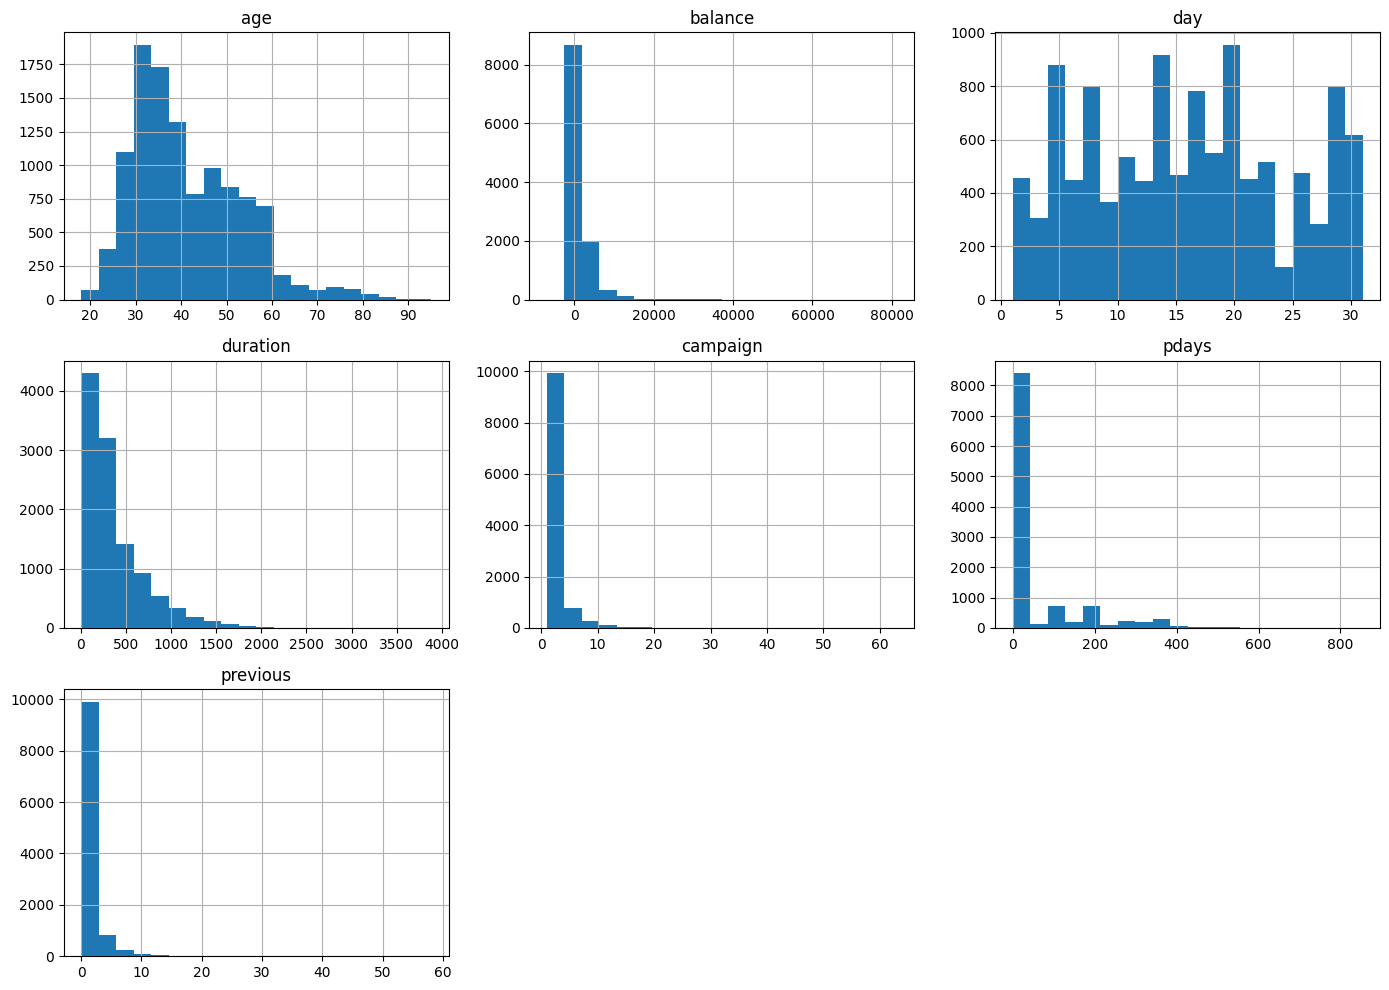

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [50]:
# distribution .
import matplotlib.pyplot as plt
bank.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()
#statistiques
display(bank.describe())

Les variables age, balance, duration, pdays et previous contiennent des outliers qu'il faudra explorer par la suite.

### 3- Distribution des variables catégorielles

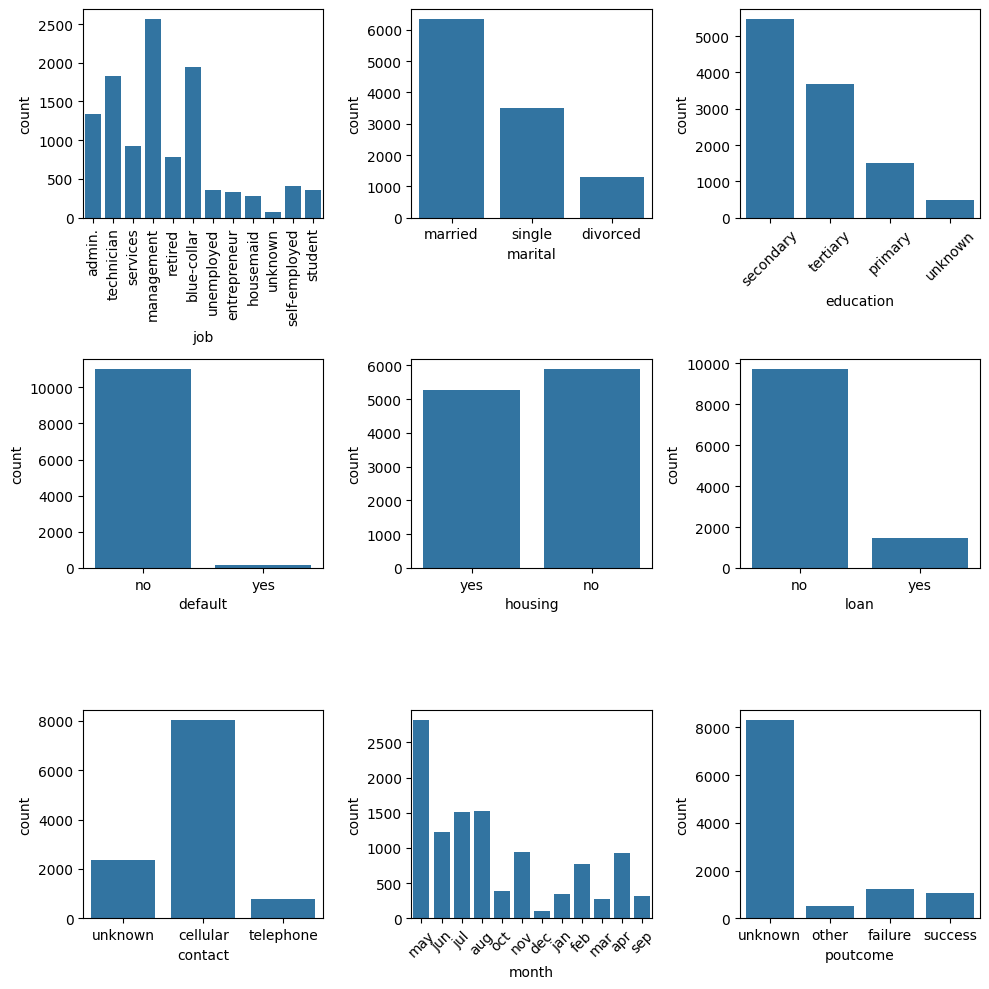

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [51]:
# @title
fig = plt.figure(figsize=(10,10))
plt.subplot(331)
sns.countplot(x='job', data=bank)
plt.xticks(rotation=90)
plt.subplot(332)
sns.countplot(x='marital', data=bank)
plt.subplot(333)
sns.countplot(x='education', data=bank)
plt.xticks(rotation=45)
plt.subplot(334)
sns.countplot(x='default', data=bank)
plt.subplot(335)
sns.countplot(x='housing', data=bank)
plt.subplot(336)
sns.countplot(x='loan', data=bank)
plt.subplot(337)
sns.countplot(x='contact', data=bank)
plt.subplot(338)
sns.countplot(x='month', data=bank)
plt.xticks(rotation=45)
plt.subplot(339)
sns.countplot(x='poutcome', data=bank)
plt.tight_layout()
plt.show()

#statistiques
cat_col=bank[['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']]
display(cat_col.describe())

Les variables education, poutcome et contact contiennent une modalité "Unknown", susceptible d'introduire un biais dans notre modèle final. Nous aborderons son traitement dans la suite du projet.

Pour une description globale du Data Set, [cliquez ici](https://docs.google.com/spreadsheets/d/1rH4xtblzcvD3e8cWeCKp1JmIp8oFyfEgtx487u-zuXc/edit?gid=0#gid=0).


### 4- Distribution de la variable cible

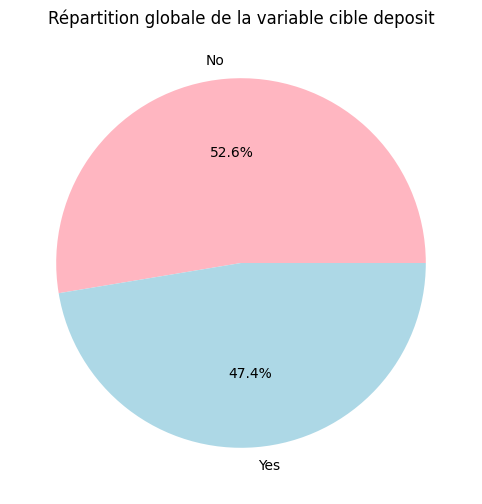

In [52]:
plt.figure(figsize=(8, 6))
bank['deposit'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightpink', 'lightblue'], labels=['No', 'Yes'])
plt.title('Répartition globale de la variable cible deposit')
plt.ylabel('')
plt.show()


La répartition relativement équilibrée de deposit rend la variable bien adaptée pour une modélisation prédictive. Le léger biais vers no (52,6%) souligne l'importance d'analyser les caractéristiques spécifiques des clients ayant souscrit (yes) pour comprendre leurs comportements et améliorer les campagnes marketing.


### 5- Relation entre les variables numériques et la variable cible

In [53]:

# Création de la figure avec des subplots
fig = make_subplots(
    rows=3, cols=3,  # 3 lignes, 3 colonnes
    vertical_spacing=0.15,  # Espacement vertical entre les graphiques
    horizontal_spacing=0.1   # Espacement horizontal
)

# Liste des variables à analyser
variables = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
titles = [
    "Age", "Balance", "Day", "Duration",
    "Campaign", "Pdays", "Previous"
]

# Ajout des boxplots à la figure
for i, (var, title) in enumerate(zip(variables, titles)):
    row = (i // 3) + 1  # Calcul de la ligne
    col = (i % 3) + 1   # Calcul de la colonne

    fig.add_trace(
        go.Box(x=bank["deposit"], y=bank[var], name=title, boxmean=True),
        row=row, col=col
    )

    # Ajout du titre sous chaque graphique
    fig.update_xaxes(title_text=title, row=row, col=col)

# Mise en page
fig.update_layout(
    title_text="Distribution des variables numériques en fonction de la souscription",
    height=900, width=1000,
    showlegend=False
)

# Affichage du graphique
fig.show()


**Interprétation par variable**:

**Age** :
La distribution des âges est relativement similaire entre les clients ayant souscrit (yes) et ceux n'ayant pas souscrit (no), ce qui suggère que l'âge n'a pas d'impact majeur sur la souscription. Nous vérifierons cette hypothèse plus en détail dans la suite de l'analyse.

**Balance** :
forte asymétrie et présence de valeurs extrêmes.
La distribution ne montre pas de différence significative entre les groupes yes et no.

**Day** :
La distribution semble uniforme et similaire pour les deux groupes.
Cela suggère que le jour du mois n'a pas un grand impact sur la souscription.

**Duration**:
Les clients ayant souscrit à l'offre sont restés plus longtemps au téléphone.
Cette variable est très informative pour expliquer le résultat (y), mais elle ne peut pas être utilisée pour prédire ce résultat avant que l'appel n'ait lieu. Par conséquent, dans un contexte de modélisation prédictive réaliste, cette variable doit être exclue, car elle introduit une fuite d'information. Nous décidons de la conserver pour le reste de l'analyse.

**Campaign**:
La distribution de cette variable est très asymétrique.
Le graphique montre que les clients beaucoup contactés (outliers) ont une probabilité plus faible de souscrire au DAT par rapport aux autres. Cela pourrait indiquer une inefficacité dans la stratégie de contact intensif et même refléter un effet négatif (par exemple fatigue ou agacement des clients).

**Pdays**:
Cette variable est peu informative en l'état, il faudrait créer une nouvelle variable binaire (déjà contacté : oui/non) puis effectuer les analyses statistiques sur les clients déjà contactés uniquement, et enfin analyser qualitativement les clients jamais contactés. Cela nous permettra de voir comment le fait d'avoir été contacté influence notre variable cible.

**Previous**:
Les clients ayant souscrit sont davantage associés à un plus grand nombre de contacts précédents. La moyenne de previous pour les souscripteurs est de 1.17, contre 0.53 pour les non-souscripteurs.
Cela suggère que les efforts répétés de contact augmentent les chances de souscription, mais il faut étudier si un trop grand nombre de contacts peut devenir contre-productif.

### 6- Relation entre les variables catégorielles et la variable cible.

In [54]:
# @title
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Liste des variables catégorielles à analyser
categorical_vars = ["job", "education", "marital", "default", "housing", "loan", "contact", "month", "poutcome"]

fig = make_subplots(
    rows=3, cols=3, subplot_titles=categorical_vars,
    vertical_spacing=0.2, horizontal_spacing=0.15
)

colors = {"yes": "#003f5c", "no": "#d45087"}

# Ajout des barplots pour chaque variable catégorielle
for i, var in enumerate(categorical_vars):
    row = (i // 3) + 1
    col = (i % 3) + 1

    # Calcul des proportions de "yes" et "no" pour chaque catégorie
    grouped_data = bank.groupby([var, "deposit"]).size().reset_index(name="count")

    # Création du barplot
    for deposit_value in ["yes", "no"]:
        filtered_data = grouped_data[grouped_data["deposit"] == deposit_value]
        fig.add_trace(
            go.Bar(
                x=filtered_data[var], y=filtered_data["count"],
                name=f"{var} - {deposit_value}",
                marker_color=colors[deposit_value],
                opacity=0.85
            ), row=row, col=col
        )

# Mise en page
fig.update_layout(
    title_text="Relation entre 'deposit' et les variables catégorielles",
    height=1200, width=1000,
    showlegend=False,
    template="plotly_white"  # Fond blanc épuré
)

# Affichage du graphique
fig.show()


**Interprétation par variable** :

**job**:
 Les managers, les techniciens et les ouvries sont les plus gros souscripteurs. Le taux de souscription dépasse le taux de non souscription chez les managers, retraités, étudiants et personnes sans emploi.

**education**:
les clients ayant une éducation tertiaire souscrivent plus souvent que les autres catégories.

**marital**:
Les célibataires sont plus enclins à souscrire que les mariés.

**default**:
Cette variable apporte peu d'informations car elle est dominée par une modalité unique :"no".

**housing**:
Les clients ayant un prêt immobilier sont moins enclins à souscrire au DAT.

**loan**:
Cette variable est déséquilibrée et n'est pas très utile pour le reste de l'analyse.
le peu de clients qui ont un prêt de consommation ont majoritairement refusé la souscription.

**contact**:
Le type de contact n'a pas d'influence sur la souscription.

**month**:
la plupart des clients sont contactés en mai et c'est pendant ce même mois où il y a le plus de refus de souscription, peu de clients sont contactés en septembre, mars, décembre.

**poutcome**:
on remarque que 74.6% des résultats sont unknowns ce qui indique un manque d'informations.

si nous regardons la relation avec deposit, nous pouvons remarquer que les clients ayant un résultat positif lors de campagnes précédentes ont une probabilité beaucoup plus élevée de souscrire :
978 souscriptions contre 93 non-souscriptions.
Les clients avec un résultat failure ou unknown sont principalement liés à une non-souscription.
La forte proportion de unknown dans poutcome (74.6 %) limite l'analyse de l'effet des campagnes précédentes. mais nous préfèrons garder la colonne car les catégories connues montrent une relation significative avec Deposit. nous pourrons mieux vérifier sa pertinence lors de l'étape de machine learning.


### 7- Autres visualisations

####Relation entre "housing", "marital", "education" et "deposit

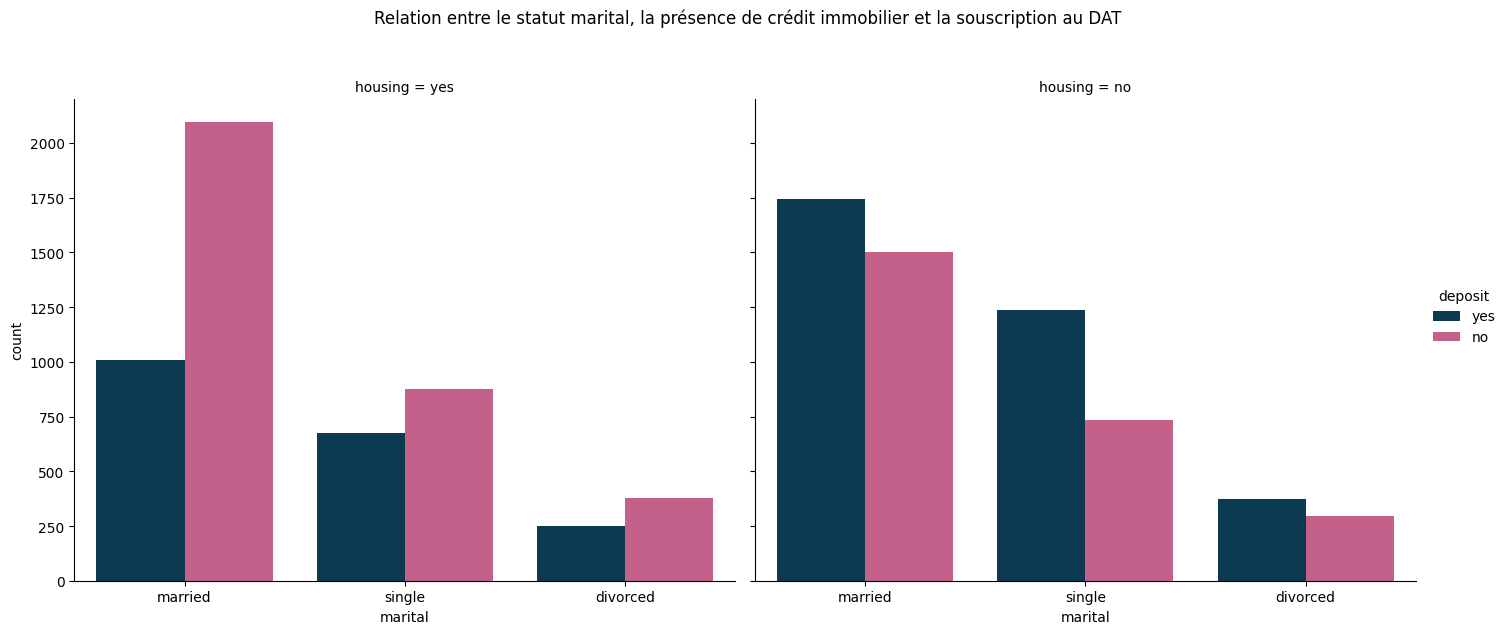

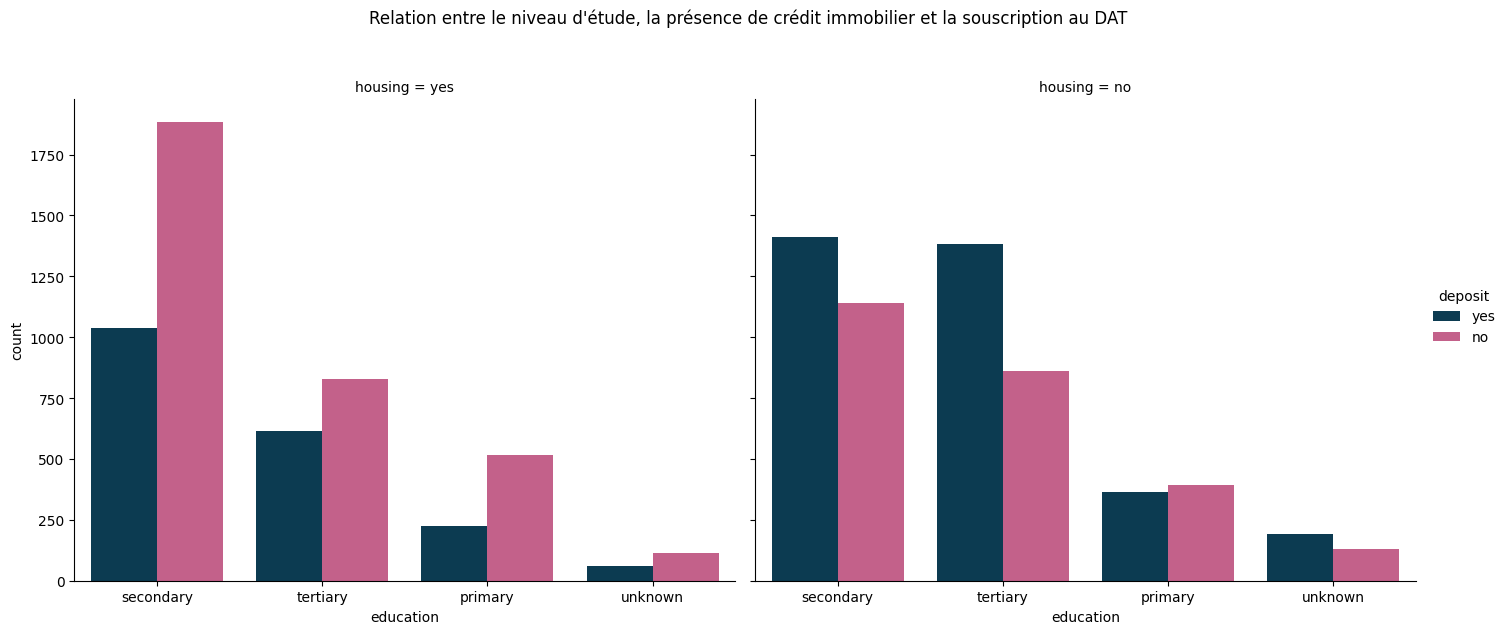

In [55]:
# @title

colors = {"yes": "#003f5c", "no": "#d45087"}

g1 = sns.catplot(
    x='marital', hue='deposit', col='housing', kind='count',
    data=bank, height=6, aspect=1.2, palette=colors
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Relation entre le statut marital, la présence de crédit immobilier et la souscription au DAT", y=1.05)

g2 = sns.catplot(
    x='education', hue='deposit', col='housing', kind='count',
    data=bank, height=6, aspect=1.2, palette=colors
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Relation entre le niveau d'étude, la présence de crédit immobilier et la souscription au DAT", y=1.05)

plt.show()


Nous pouvons observer à partir du graphique ci-dessus, que quelque soit le niveau d'étude ou le statut marital de l'individu, la variable housing a un impact fort sur la souscription. Cela montre son importance par rapport aux autres variables dans notre jeu de donnée.

#### Age, solde bancaire et défaut de paiement

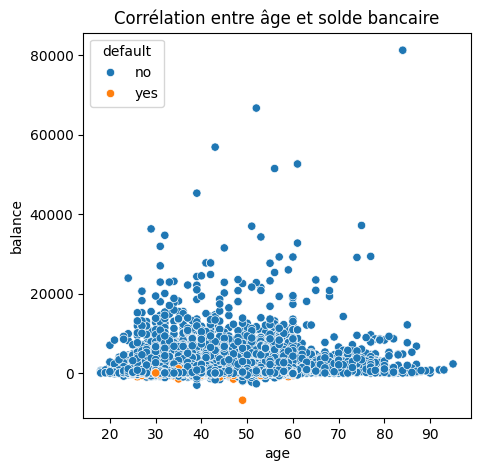

In [56]:
#corrélation entre l'âge et le solde bancaire
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'age', y='balance', data = bank, hue='default')
plt.title('Corrélation entre âge et solde bancaire')
plt.show();

Les personnes ayant fait défaut sont très peu nombreuses et semblent avoir un solde bancaire relativement bas.

La majorité des points sont concentrés dans la zone de solde bancaire inférieur à 20 000 et sur une tranche d'âge allant de 20 à 60 ans.
Cela indique que la plupart des clients ont un solde relativement modeste, indépendamment de leur âge.

Pas de corrélation claire entre l'âge et le solde : les soldes bancaires restent très dispersés sur toute la plage d'âge.
Cependant, les jeunes adultes ont tendance à avoir un solde plus faible par rapport aux individus plus âgés. Cela peut être lié à l'évolution des revenus et de l'épargne avec le temps.


#### Prêt immobilier, prêt à la consommation et souscription

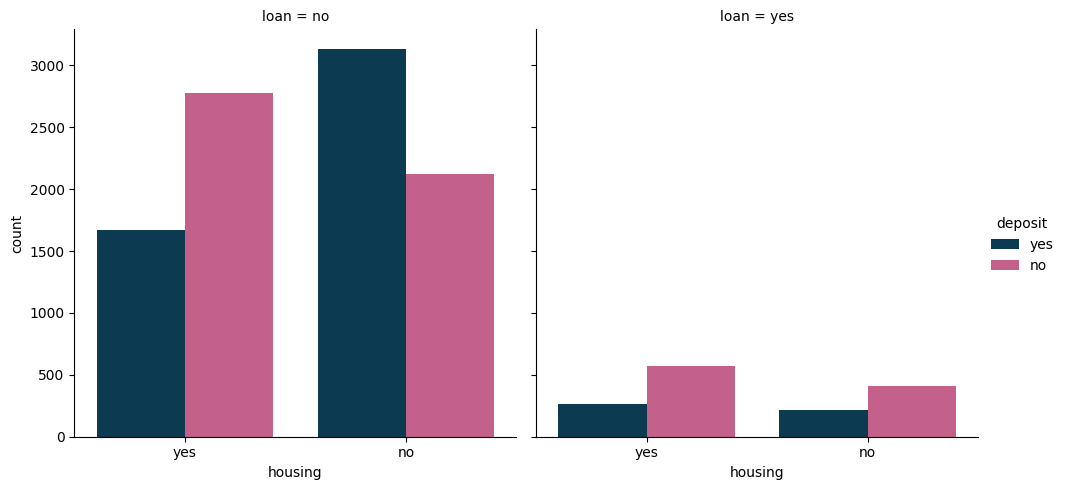

<Figure size 600x400 with 0 Axes>

In [57]:
#corrélation housing et loan avec la variable cible
sns.catplot(
    x="housing", hue="deposit", col="loan", kind="count",
    data=bank, height=5, aspect=1, palette={"yes": "#003f5c", "no": "#d45087"}
)
plt.figure(figsize=(6, 4))
plt.subplots_adjust(top=0.9)
plt.suptitle("Impact du crédit immobilier et du prêt personnel sur la souscription")
plt.show()


Nous remarquons grâce à cette visualisation que
- Les clients sans prêts sont ceux qui ont le plus de probabilité de souscrire à la campagne
- Les clients ayant seulement un prêt logement sont moins susceptibles
- Les clients ayant seulement un prêt conso ont une probabilité de souscription légerement inférieure à ceux ayant un prêt logement
- Les clients ayant les deux prêts sont ceux avec la probabilité de souscription la plus faible

l'interaction entre housing et loan peut donc être utile pour la suite de notre analyse avec les modèles prédictifs

####Pourcentage de souscription par variable

In [58]:
# @title
import plotly.express as px
import pandas as pd

# Supposons que 'bank' soit un DataFrame pandas
df = bank.copy()

df['pdays_contacted'] = df['pdays'].apply(lambda x: 'Déjà contacté' if x != -1 else 'Non contacté')
import datetime as dt
df['day_1'] = pd.to_datetime(df['day'], format='%d')
df['weekday'] = df['day_1'].dt.day_name()
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ["age <= 25", "25 <= age <= 35", "35 <= age <= 45", "45 <= age <= 55", "55 <= age <= 65", "age > 65"]
df["age"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

# Liste des variables catégoriques à analyser
categories = ['month', 'poutcome', 'housing', 'pdays_contacted', 'age', 'weekday', 'age']

# Création des sous-graphiques
figures = []
for category in categories:
    category_percent = df.groupby(category)['deposit'].value_counts(normalize=True).mul(100).unstack()
    category_percent = category_percent.reset_index()

    fig = px.bar(
        category_percent,
        x=category,
        y=['yes', 'no'],
        title=f'Pourcentage de souscription par {category}',
        labels={'value': 'Pourcentage de souscription', category: category.capitalize()},
        barmode='group',
        color_discrete_sequence=["#003f5c","#d45087"]
    )
    figures.append(fig)

# Affichage des graphiques
for fig in figures:
    fig.show()


D'après ces dernières visualisations, nous remarquons que les informations les plus pertinentes pour la suite de notre analyse en lien avec la variable cible en plus de "duration" seraient :  les variables sur les clients ayant un prêt immobilier ou non ('housing'), la réponse des clients à l'ancienne campagne ('poutcome') et le mois de l'appel.

Une nouvelle variable susceptible d’influencer la souscription émerge : l’âge. Bien que cette tendance n’ait pas été évidente lors de la première comparaison avec un boxplot, le barplot révèle que certaines tranches d’âge sont plus enclines à souscrire, notamment les clients âgés de 65 ans et plus et de 25 ans et moins.

## III- Pre-processing et feature engineering

### 1- Gestion des valeurs "Unknown"/"Other"


Pour mieux signaler les données absentes, nous remplaçons les modalités "unknown" et "other" par "nan".

In [59]:
bank=bank.replace(["unknown", "Unknown", "UNKNOWN", "other", "Other", "OTHER"], np.nan)
display(bank.isna().sum())

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


Les variables job, education, contact et poutcome contiennent des valeurs manquantes, nous les traiterons après avoir divisé l'ensemble d'apprentissage et de test pour ne pas provoquer une fuite de données.


### 2- Sélection des variables

**Variable "default"**

In [60]:
#Analysons la distribution de la variable 'default'
display(bank['default'].value_counts())

,count
default,
no,10994
yes,168


98% des clients ne sont pas en défaut de paiement.
Nous décidons donc d'exclure cette variable car elle ne différencie pas les clients entre eux.

**Variable "contact":**

In [61]:
#distribution de la variable "Contact"
display(bank['contact'].value_counts(dropna=False))

,count
contact,
cellular,8042
NaN,2346
telephone,774


la variable "contact" est dominée par une seule modalité "cellular" 72% et n'a pas d'impact sur la souscription comme vu précédemment, nous
excluons cette colonne.

Les variables "poutcome" et "loan" sont également majoritairement représentées par une seule modalité. Toutefois, nos analyses précédentes ont mis en évidence une certaine corrélation entre la souscription et le résultat de la campagne précédente, ainsi que l'influence du prêt à la consommation sur la souscription. Ces deux variables s'avèrent donc essentielles pour la suite de notre analyse.

**Corrélation entre les variables**

regardons si certaines variables numériques sont corrélées entre elles et peuvent créer une redondance dans le jeu de données.

In [62]:
corr_matrix = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corr()

# Création de la heatmap avec Plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # Affiche les valeurs de corrélation dans la heatmap
    labels=dict(color="Corrélation"),  # Légende de la barre de couleur
    x=corr_matrix.columns,  # Noms des colonnes
    y=corr_matrix.columns,  # Noms des lignes
    color_continuous_scale="Blues"  # Palette de couleurs (ajuster si besoin)
)

# Mise en page
fig.update_layout(
    title="Heatmap des Corrélations",
    coloraxis_colorbar=dict(title="Coefficient"),
    width=700, height=600
)

# Affichage
fig.show()


les variables pdays et previous ont une corrélation de 0,5, regardons de plus près les distributions des deux variables.

Pour affiner l'analyse et réduire l'effet des valeurs extrêmes, nous regrouperons les valeurs en catégories significatifs :
'jamais contacté (0)', '1 seul contact', '2 à 5 contacts', 'plus de 6 contacts' pour **previous**.
et 'Jamais contacté (-1)', '0-6 mois', '6 mois-1 an', '> 1 an' pour **pdays**.

In [63]:
# @title

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Catégories pour 'previous'
previous_bins = [0, 1, 2, 6, np.inf]
previous_labels = ['jamais contacté (0)', '1 seul contact', '2 à 5 contacts', 'plus de 6 contacts']

# Catégories pour 'pdays'
pdays_bins = [-1, 0, 180, 365, np.inf]
pdays_labels = ['Jamais contacté (-1)', '0-6 mois', '6 mois-1 an', '> 1 an']

# Création des colonnes catégoriques
bank['previous_binned'] = pd.cut(bank['previous'], bins=previous_bins, labels=previous_labels, right=False)
bank['pdays_binned'] = pd.cut(bank['pdays'], bins=pdays_bins, labels=pdays_labels, right=False)

# Comptage des occurrences pour les camemberts
previous_counts = bank['previous_binned'].value_counts().sort_index()
pdays_counts = bank['pdays_binned'].value_counts().sort_index()

# Création de la figure avec des subplots
fig = make_subplots(
    rows=1, cols=2,  # 1 ligne, 2 colonnes
    subplot_titles=(
        "Distribution de la variable previous",
        "Distribution de la variable pdays"
    ),
    specs=[[{"type": "domain"}, {"type": "domain"}]]  # "domain" pour les camemberts
)

# Graphique 1 : Camembert pour `previous`
fig.add_trace(
    go.Pie(
        labels=previous_counts.index,  # Les étiquettes des catégories
        values=previous_counts.values,  # Les valeurs correspondantes
        hole=0.3,  # Donut effect (optionnel)
        marker=dict(colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']),
    ),
    row=1, col=1
)

# Graphique 2 : Camembert pour `pdays`
fig.add_trace(
    go.Pie(
        labels=pdays_counts.index,  # Les étiquettes des catégories
        values=pdays_counts.values,  # Les valeurs correspondantes
        hole=0.3,  # Donut effect (optionnel)
        marker=dict(colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']),
    ),
    row=1, col=2
)

# Mise à jour de la disposition
fig.update_layout(
    title_text="Visualisation des distributions de previous et pdays (catégorisées)",
    height=800,
    showlegend=True  # Affiche la légende
)

fig.show()


Test chi2 pour vérifier laquelle des deux variables est la plus corrélée à la variable cible.

In [64]:
table=pd.crosstab(bank['previous_binned'], bank['deposit'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
display("p-value de previous est", p)

table_2=pd.crosstab(bank['pdays_binned'], bank['deposit'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table_2)
display("p-value de pdays est", p)

'p-value de previous est'

7.981702180695799e-129

'p-value de pdays est'

6.778955196883586e-137

La p valeur de pdays est plus faible donc elle est plus corrélée à notre variable cible. Nous décidons de garder pdays et de supprimer previous.


In [65]:
#supression des variables non pertinentes
bank.drop(['default', 'contact', 'previous', 'previous_binned'], axis=1, inplace=True)
bank.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,poutcome,deposit,pdays_binned
0,59,admin.,married,secondary,2343,yes,no,5,may,1042,1,-1,NaN,yes,Jamais contacté (-1)
1,56,admin.,married,secondary,45,no,no,5,may,1467,1,-1,NaN,yes,Jamais contacté (-1)
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,NaN,yes,Jamais contacté (-1)
3,55,services,married,secondary,2476,yes,no,5,may,579,1,-1,NaN,yes,Jamais contacté (-1)
4,54,admin.,married,tertiary,184,no,no,5,may,673,2,-1,NaN,yes,Jamais contacté (-1)


### 3- Gestion des outliers

In [66]:

# Fonction pour calculer les outliers et leur pourcentage
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(df)) * 100

# Liste des variables à analyser
variables = ['balance', 'age', 'campaign', 'pdays', 'duration']

# Création du tableau des outliers
outliers_data = {"Variable": [], "Nombre d'outliers": [], "Pourcentage d'outliers (%)": []}

for var in variables:
    num_outliers, perc_outliers = detect_outliers(bank, var)
    outliers_data["Variable"].append(var)
    outliers_data["Nombre d'outliers"].append(num_outliers)
    outliers_data["Pourcentage d'outliers (%)"].append(round(perc_outliers, 2))

# Affichage sous forme de DataFrame
outliers_table = pd.DataFrame(outliers_data)
print(outliers_table)




   Variable  Nombre d'outliers  Pourcentage d'outliers (%)
0   balance               1055                        9.45
1       age                171                        1.53
2  campaign                601                        5.38
3     pdays               2750                       24.64
4  duration                636                        5.70


Nous pouvons remarqer que pdays contient le plus d'outliers

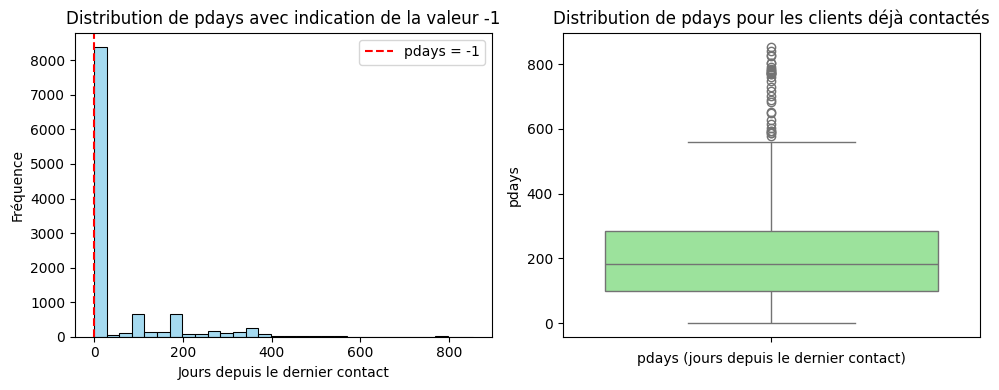

In [67]:
# Création de la figure avec des subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Distribution de la variable pdays
sns.histplot(bank['pdays'], bins=30, color='skyblue', ax=axes[0])
axes[0].axvline(x=-1, color='red', linestyle='--', label='pdays = -1')
axes[0].set_title('Distribution de pdays avec indication de la valeur -1')
axes[0].set_xlabel('Jours depuis le dernier contact')
axes[0].set_ylabel('Fréquence')
axes[0].legend()

# Boxplot pour analyser quantativement pdays (excluant -1)
contacted_bank = bank[bank['pdays'] >= 0]
sns.boxplot(y='pdays', data=contacted_bank, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution de pdays pour les clients déjà contactés')
axes[1].set_xlabel('pdays (jours depuis le dernier contact)')

plt.tight_layout()
plt.show()

Interprétation :

Dans le premier graphique, la barre dominante représente les clients jamais contactés dans le passé. Les autres valeurs (positives) de pdays sont dispersées entre 0 et 850 jours, avec une fréquence beaucoup plus faible. Cette observation valide notre hypothèse initiale (la valeur -1 est une catégorie qualitative distincte et non une valeur quantitative) et justifie la création d’une variable binaire pour séparer les clients jamais contactés de ceux déjà contactés.

Lorsque nous excluons pdays = -1, la distribution des valeurs devient plus cohérente et représentative des clients déjà contactés comme nous pouvons l'observer dans le boxplot. Cela confirme que les clients déjà contactés ont une grande variabilité dans le temps écoulé depuis leur dernier contact, ce qui pourrait avoir un impact sur leur probabilité de souscription. Pour vérifier cela, nous avons créer des sous-catégories de pdays (variable pdays_binned)  pour les personnes déjà contactées en fonction des valeurs du boxplots (0-6mois, 6mois-1an, et >1an) pour voir si pdays a un impact sur notre variable cible.

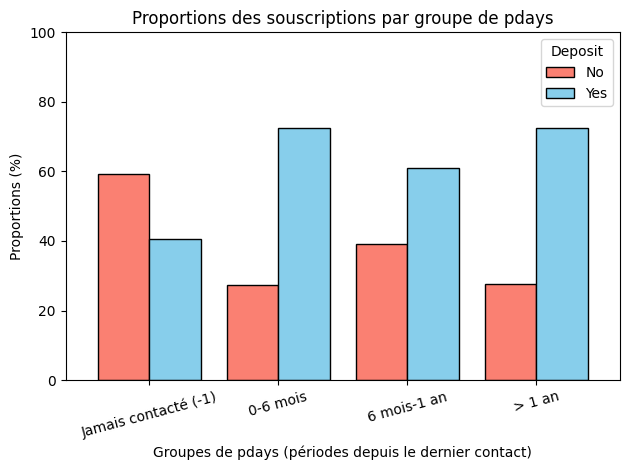

In [68]:
# Barplot pour comparer les proportions de souscriptions par groupe de pdays
grouped = bank.groupby('pdays_binned')['deposit'].value_counts(normalize=True).unstack() * 100

grouped.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black', width=0.8)
plt.title("Proportions des souscriptions par groupe de pdays")
plt.xlabel("Groupes de pdays (périodes depuis le dernier contact)")
plt.ylabel("Proportions (%)")
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.legend(title="Deposit", labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Nous observons alors dans le 3e graphique que le fait d’avoir été contacté dans le passé influe positivement sur la probabilité de souscription, et peu importe le nombre de jours qui s'est écoulé depuis le dernier contact (car même pour les personnes contactées il y a plus d'1an, elles sont plus susceptibles de souscrire au DAT). Cette relation confirme une nouvelle fois que pdays = -1 représente une catégorie qualitative distincte, impactant la variable cible (deposit).

#### **Traitement de pdays**

In [69]:
# Ajouter une colonne binaire indiquant si le client a été contacté
bank['pdays_contacted'] = (bank['pdays'] != -1).astype(int)
# Supression des variables pdays et pdays_binned
bank.drop(['pdays', 'pdays_binned'], axis=1, inplace=True)
bank.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,poutcome,deposit,pdays_contacted
0,59,admin.,married,secondary,2343,yes,no,5,may,1042,1,NaN,yes,0
1,56,admin.,married,secondary,45,no,no,5,may,1467,1,NaN,yes,0
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,NaN,yes,0
3,55,services,married,secondary,2476,yes,no,5,may,579,1,NaN,yes,0
4,54,admin.,married,tertiary,184,no,no,5,may,673,2,NaN,yes,0


#### **Traitement de campaign**

Comme vu lors de la partie visualisation, les clients beaucoup contactés (outliers) ont une probabilité plus faible de souscrire au DAT par rapport aux autres. Il est donc pertinent de conserver les outliers de cette variable.
Nous allons simplement catégoriser cette variable afin de corriger la distribution asymétrique et de réduire l'effet des valeurs extrêmes.

In [70]:
#catégorisation de la variable campaign
def categorize_campaign(campaign):
    if campaign == 1:
        return '1 fois'
    elif campaign == 2:
        return '2 fois'
    elif 3 <= campaign <= 6:
        return '3-6 fois'
    else:  # Pour toutes les valeurs > 6
        return '> 6 fois'

bank['campaign'] = bank['campaign'].apply(categorize_campaign)
percentages = bank['campaign'].value_counts(normalize=True) * 100
print(percentages)

campaign
1 fois      42.985128
2 fois      27.127755
3-6 fois    24.502777
> 6 fois     5.384340
Name: proportion, dtype: float64


Les pourcentages montrent qu'il y a une répartition cohérente dans les catégories proposées donc nous allons catégoriser campaign de cette sorte. Cela évitera la sur-segmentation et nous permettra d'utiliser campaign comme une variable catégorielle dans des modèles supervisés.


####**Traitement de duration**

Nous avons vu précédemment que les clients qui restent le plus longtemps au téléphone ont plus de chance de souscrire au DAT.
Nous pouvons nous demander si les clients raccrochant quasi directement, donc n'étant pas intéressé directement par le sujet, pourrait biaiser nos données. Nous allons donc enlever les clients étant restés au téléphone moins d'une minute :

In [71]:
filtered_df = bank[bank['duration'] >= 60]

fig = px.box(
    filtered_df,
    x='deposit',
    y='duration',
    color='deposit',
    title="Comparaison de la durée d'appel (>= 60 s) en fonction de la souscription",
    labels={'deposit': "Souscription à l'offre (deposit)", "duration": "Durée de l'appel (en secondes)"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

La tendance reste la même, la présence d'outliers n'impacte pas notre résultat.

#### **Traitement de Balance**

In [72]:
q1 = bank['balance'].quantile(0.25)
q3 = bank['balance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_bank = bank[(bank['balance'] > lower_bound) & (bank['balance'] < upper_bound)]

# Création du boxplot avec Plotly
fig = px.box(
    filtered_bank,
    x='deposit',
    y='balance',
    color='deposit',
    title="Comparaison du solde bancaire en fonction de la souscription (sans les outliers)",
    labels={'deposit': "Souscription à l'offre (deposit)", 'balance': "Solde bancaire"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

Pour la variable balance avec 9% d'outliers, nous avons choisi d'appliquer une normalisation robuste dans la prochaine étape qui réduit l'influence des valeurs extrêmes sans les supprimer, afin de préserver l'intégrité des données.



### 4- Transformation des variables

Nous allons encoder les variables binaires ainsi que la variable "month", à noter que c'est un encodage simple qui consiste à remplacer les mois en lettre par des chiffres et les "yes" et "no" dans les colonnes binaires par "0" et "1". Cette transformation ne provoque pas une fuite de donnée et peut être réalisée avant la séparation du jeu de donnée.

Nous convertissons la colonne 'month' au format numérique :

In [73]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

bank['month'] = bank['month'].str.lower().map(month_mapping)

In [74]:

bank.replace({'no':0,'yes':1}, inplace=True)
bank.head()


,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,poutcome,deposit,pdays_contacted
0,59,admin.,married,secondary,2343,1,0,5,5,1042,1 fois,NaN,1,0
1,56,admin.,married,secondary,45,0,0,5,5,1467,1 fois,NaN,1,0
2,41,technician,married,secondary,1270,1,0,5,5,1389,1 fois,NaN,1,0
3,55,services,married,secondary,2476,1,0,5,5,579,1 fois,NaN,1,0
4,54,admin.,married,tertiary,184,0,0,5,5,673,2 fois,NaN,1,0


Nous convertissons la colonne "duration" en minutes et arrondissons les valeurs à 2 chiffres après la virgule pour plus de lisibilité.

In [75]:
bank['duration'] = bank['duration'] / 60
bank['duration'] = bank['duration'].round(2)


Pour la variable poutcome, nous allons créer une nouvelle catégorie correspodant aux valeurs manquantes. nous allons donc remplacer les Nan par missing.

In [76]:
bank['poutcome'].fillna('missing', inplace=True)

### 5- Feature engineering

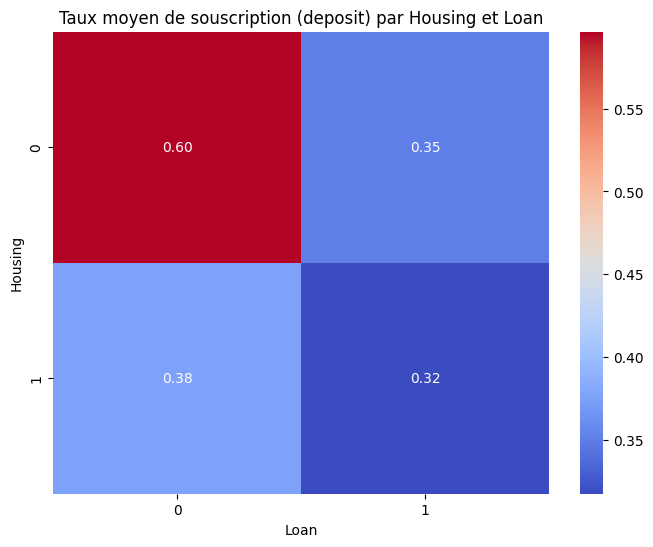

In [77]:
#creation d'une heatmap entre ces données
cross_tab = pd.crosstab(
    index=bank['housing'],
    columns=bank['loan'],
    values=bank['deposit'],
    aggfunc='mean'
)
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Taux moyen de souscription (deposit) par Housing et Loan')
plt.xlabel('Loan')
plt.ylabel('Housing')
plt.show()

Comme vu précédemment et comme le montre le graphique ci-dessus, les clients ayant les deux prêts sont ceux avec la probabilité de souscription la plus faible

l'interaction entre housing et loan peut donc être utile pour la suite de notre analyse avec les modèles prédictifs. Nous ajoutons donc une nouvelle variable d'interaction entre housing et loan qui capture l'effet combiné.

In [78]:
bank['housing_loan_interaction'] = bank['housing'] & bank['loan']
bank.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,poutcome,deposit,pdays_contacted,housing_loan_interaction
0,59,admin.,married,secondary,2343,1,0,5,5,17.37,1 fois,missing,1,0,0
1,56,admin.,married,secondary,45,0,0,5,5,24.45,1 fois,missing,1,0,0
2,41,technician,married,secondary,1270,1,0,5,5,23.15,1 fois,missing,1,0,0
3,55,services,married,secondary,2476,1,0,5,5,9.65,1 fois,missing,1,0,0
4,54,admin.,married,tertiary,184,0,0,5,5,11.22,2 fois,missing,1,0,0


Maintenant que notre dataset est prêt, nous pouvons passer à l'étape de modélisation.

## IV- Modélisation :

### Itération 1 :

**Séparation du jeu de donnée**


In [106]:
features=bank.drop(columns=['deposit'])
target=bank['deposit']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.25, random_state = 42, stratify=target)


**Gestion des valeurs manquantes**

In [108]:
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Mode pour les colonnes catégorielles
X_train[['job', 'education']] = categorical_imputer.fit_transform(X_train[['job','education']])
X_test[['job', 'education']] = categorical_imputer.transform(X_test[['job', 'education']])

**Encodage**

Pour le bon fonctionnement de la majorité des algorithmes de Machine Learning sur Scikit learn, les variables catégorielles doivent être transformées en variables numériques.

In [109]:

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# education est une variable catégorielle ordinale, remplacer les modalités de la variable par des nombres, en gardant l'ordre initial
X_train['education'] = X_train['education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2})
X_test['education'] = X_test['education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2})

# job, marital et poutcome sont des variable catégorielles nominale, dans ce cas l'encodage one-hot est à privilégier
# Initialiser le OneHotEncoder (drop='first' évite la multicolinéarité, optionnel)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Colonnes à encoder
col = ['job', 'marital', 'poutcome', 'campaign']

# Appliquer l'encodage
encoder.fit(X_train[col])
X_train_encode = encoder.transform(X_train[col])
X_test_encode = encoder.transform(X_test[col])

# Convertir les tableaux encodés en DataFrames
train_encoded_df = pd.DataFrame(X_train_encode, columns=encoder.get_feature_names_out(col))
test_encoded_df = pd.DataFrame(X_test_encode, columns=encoder.get_feature_names_out(col))

# Supprimer la colonne originale 'position' et concaténer les nouvelles colonnes encodées
X_train = pd.concat([X_train.drop(columns=col), train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=col), test_encoded_df], axis=1)

**Normalisation**

Normalisation robuste pour prendre en compte les outliers

In [110]:
#Utilisation de RobustScaler pour les données numériques
numerical_columns = ['age', 'balance', 'day', 'duration']
scaler = RobustScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

**Modélisation**

Nous allons tester 3 modèles simples : La régression logistique, l'arbre de décision et la forêt aléatoire .
et 3 modèles avancés :  Le Bagging Classifier, l’Ada Boost Classifier et le Gradient Boosting Classifier.

*Contexte métier*

Dans le contexte de la prédiction si les clients des banques accepteront ou non un dépôt à terme, les faux positifs et les faux négatifs sont deux types d'erreurs de prédiction qui peuvent survenir lors de l'utilisation d'un modèle de classification. Ces erreurs ont des implications différentes pour la banque et peuvent entraîner divers coûts ou pertes. Un faux positif se produit lorsque le modèle prédit qu'un client souscrira à un dépôt à terme alors que ce n'est pas vrai en réalité, cela va induire des dépenses inutiles à la banque, les dépenses comprennent le cout de la campagne, le temps aloué aux clients, les offres d'incitations etc.
Un faux négatif se produit lorsque le modèle prédit qu'un client ne souscrira pas au DAT alors qu'il le fait en réalité. la perte associée aux faux négatifs inclut les revenus que la banque aurait pu gagner grâce aux dépôts à terme manqués, ainsi que le potentiel de fidélisation des clients à long terme et les opportunités commerciales supplémentaires avec ces clients.

Le choix entre réduire les faux positifs ou les faux négatifs dépend des priorités de la banque et de la finalité de notre modélisation.


Pour rappel :

accuracy=(VP+VN)/n

précision=VP/(VP+FP)

Rappel = VP/(VP+FN)

**Notre approche : Un équilibre entre rappel et précision avec le F1-score.**

Dans notre cas, la banque souhaite minimiser les faux négatifs afin de maximiser le nombre de souscripteurs identifiés. Cependant, augmenter uniquement le rappel risquerait d'accroître les faux positifs, ce qui engendrerait des coûts inutiles. Pour trouver un équilibre optimal entre rappel (Recall) et précision (Precision), nous utiliserons le F1-score comme métrique principale :

In [111]:

# Définition des modèles
cl1 = LogisticRegression(random_state=42, n_jobs=-1)
cl2 = RandomForestClassifier(random_state=42, n_jobs=-1)
cl3 = DecisionTreeClassifier(random_state=42)
bagg_class = BaggingClassifier(random_state=42, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1)
adapt_boost_class = AdaBoostClassifier(random_state=42)
grad_boost_class = GradientBoostingClassifier(random_state=42)

# Liste des modèles
models = [cl1, cl2, cl3, bagg_class, adapt_boost_class, grad_boost_class]

# DataFrame pour stocker les résultats
cross_val_df = pd.DataFrame(columns=['Model', 'Mean Recall', 'Std Recall', 'Mean Precision', 'Std Precision', 'Mean F1', 'Std F1'])

# Boucle sur chaque modèle
for model in models:
 recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
 precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
 f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
 cross_val_df.loc[len(cross_val_df)] ={'Model': model.__class__.__name__, 'Mean Recall': recall_scores.mean(),'Std Recall':recall_scores.std(), 'Mean Precision': precision_scores.mean(), 'Std Precision':precision_scores.std(), 'Mean F1': f1_scores.mean(), 'Std F1': f1_scores.std()}


# Affichage des résultats
display(cross_val_df)

,Model,Mean Recall,Std Recall,Mean Precision,Std Precision,Mean F1,Std F1
0,LogisticRegression,0.754218,0.017222,0.812779,0.012053,0.782365,0.014197
1,RandomForestClassifier,0.855052,0.015105,0.808766,0.007177,0.831222,0.009844
2,DecisionTreeClassifier,0.743623,0.020506,0.770170,0.009315,0.756579,0.014051
3,BaggingClassifier,0.743127,0.019698,0.802057,0.015316,0.771356,0.015330
4,AdaBoostClassifier,0.797321,0.014605,0.788462,0.013344,0.792721,0.008985
5,GradientBoostingClassifier,0.851024,0.010371,0.819012,0.006690,0.834699,0.007982


Bien que le Gradient Boosting ait un F1-score légèrement supérieur, nous avons retenu le Random Forest pour les raisons suivantes :

Random Forest offre un F1-score compétitif tout en étant moins sensible aux outliers et au bruit.

Contrairement à d’autres modèles complexes comme Gradient Boosting, Random Forest permet d’identifier facilement les variables les plus importantes dans la prise de décision grâce à la feature importance.
Cette capacité est essentielle pour comprendre les facteurs déterminants de la souscription et orienter les actions business.

Grâce à son mécanisme d’agrégation d’arbres décisionnels (bagging), Random Forest est plus stable et moins sujet au sur-apprentissage, ce qui garantit une meilleure généralisation sur des données nouvelles.

Bien que le Gradient Boosting soit légèrement plus performant, il est également plus lent à entraîner et nécessite un réglage fin des hyperparamètres.




In [112]:
cl2.fit(X_train, y_train)

y_pred = cl2.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print(classification_report(y_test, y_pred))

Prédiction,0,1
Realité,,
0,1214,255
1,189,1133


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1469
           1       0.82      0.86      0.84      1322

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791



La matrice de confusion, ci-dessus, illustre que le nombre de bonnes classifications (sur la diagonale) est supérieur au nombre de mauvaises classifications.
le modèle prédit correctement 1214 étant de la classe 0 et se trompe sur 255 qui les classifie comme appartenant à la classe 0 alors que réelement ils appartiennent à la classe 1.

et prédit correctement 1133 comme appartenant à la classe 1 et se trompe sur 189.

Le f1-score est de 0.85 ce qui est un très bon score.

**Feature importance**

L’analyse des importances des variables permet de déterminer quelles variables influencent le plus les prédictions de notre modèle de machine learning.

<Axes: xlabel='Variables'>

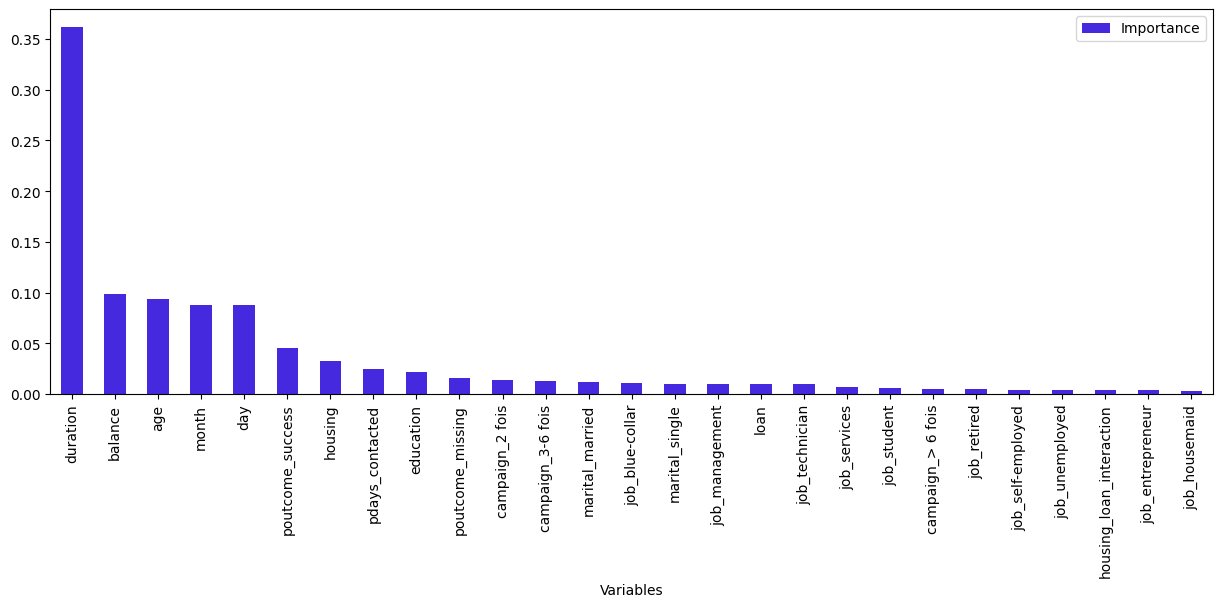

In [113]:
%matplotlib inline
final_columns = X_train.columns
feat_importances = pd.DataFrame({
    "Variables": final_columns,
    "Importance": cl2.feature_importances_
}).sort_values(by="Importance", ascending=False)
feat_importances.nlargest(30, "Importance").plot.bar(
    x="Variables",
    y="Importance",
    figsize=(15, 5),
    color="#4529de"
)

Le graphique présente les scores d'importance des variables calculés par le
modèle Random Forest. La variable duration se distingue nettement avec un score d'environ 36%. Ce score reflète sa contribution dominante à la réduction de l'erreur dans les prédictions du modèle.

Les autres variables comme balance, age et day suivent avec des contributions significatives, mais beaucoup moins élevées. Cela signifie que ces variables jouent également un rôle important, mais secondaire.

Enfin, les caractéristiques en bas du graphique, comme marital, loan, job ont des contributions faibles voire négligeables, ce qui suggère qu'elles influencent très peu les prédictions finales.

###Itération 2

À partir du dernier graphique nous avons déjà une idée sur les variables à garder et celles à supprimer pour notre prochaine itération.

--> suppression des variables  marital, loan, job, housing_loan_interaction



In [114]:
X_train_scaled_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X_test.columns)
cols_à_supprimer=[ 'loan', 'housing_loan_interaction', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single']
X_train=X_train_scaled_df.drop(columns=cols_à_supprimer)
X_test=X_test_scaled_df.drop(columns=cols_à_supprimer)

In [115]:
cl2.fit(X_train, y_train)

y_pred_before = cl2.predict(X_test)

display(pd.crosstab(y_test,y_pred_before, rownames=['Realité'], colnames=['Prédiction']))

print(classification_report(y_test, y_pred_before))

Prédiction,0,1
Realité,,
0,1209,260
1,174,1148


              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1469
           1       0.82      0.87      0.84      1322

    accuracy                           0.84      2791
   macro avg       0.84      0.85      0.84      2791
weighted avg       0.85      0.84      0.84      2791



<Axes: xlabel='Variables'>

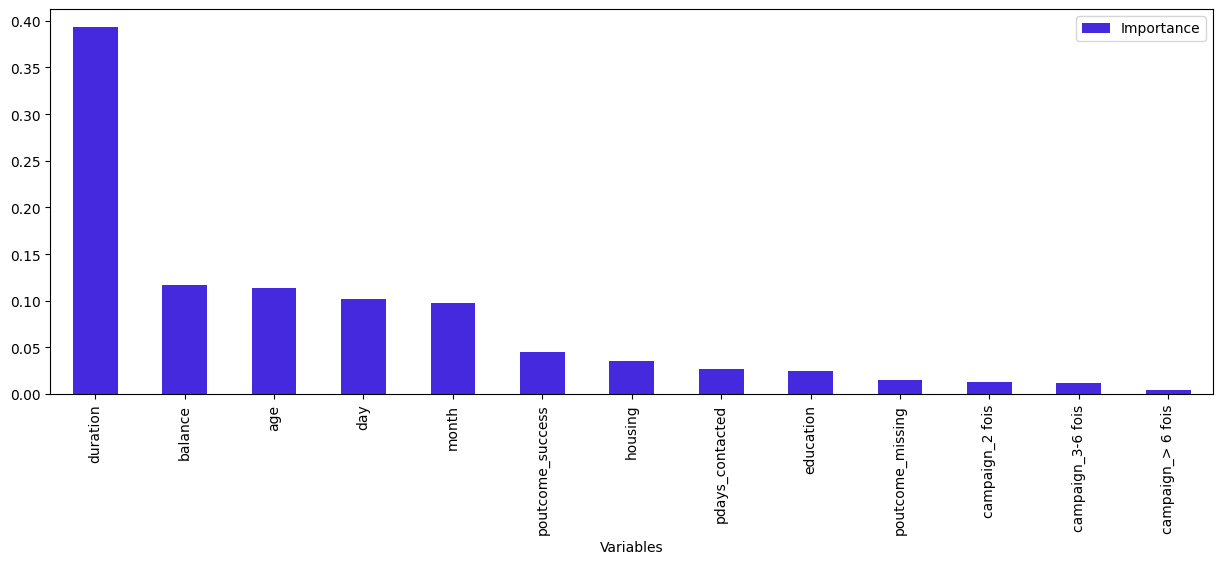

In [116]:
%matplotlib inline
final_columns = X_train.columns
feat_importances = pd.DataFrame({
    "Variables": final_columns,
    "Importance": cl2.feature_importances_
}).sort_values(by="Importance", ascending=False)
feat_importances.nlargest(30, "Importance").plot.bar(
    x="Variables",
    y="Importance",
    figsize=(15, 5),
    color="#4529de"
)

La suppression des variables n'a pas eu une grande incidence sur les scores ( particulièrement le F1-score), nous continuons sans ces variables.

###Itération 3

L’objectif de notre projet est écrit de cette manière dans l'énoncé : "prédire ***à l’avance*** si un client va souscrire au dépôt à terme".
L’énoncé parle de prédire à l’avance, sans préciser si c’est avant ou après le premier contact. Mais dans un contexte classique de télémarketing et de data science appliquée aux entreprises, le besoin principal est souvent de cibler les bons clients avant même de les contacter .

Cela signifie que dans un contexte réaliste, il est plus logique d'exclure duration et de prédire avant la campagne.

Dans nos itérations 1 et 2, nous avons tester plusieurs modèles de classification en conservant la variable duration et c'est le modèle Random Forest qui est le plus optimal.
Désormais, nous souhaitons tester ce même modèle sans duration (et toujours sans les variables avec une contribution faible) pour simuler la prédiction avant la campagne.

In [117]:
X_train_new=X_train.drop(columns=['duration'], axis=1)
X_test_new=X_test.drop(columns=['duration'], axis=1)

In [118]:

cl2 = RandomForestClassifier(random_state=42)
cl2.fit(X_train_new, y_train)
print("Recall score du Random Forest : ",
      recall_score(y_test, cl2.predict(X_test_new)))

y_pred = cl2.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print(classification_report(y_test, y_pred))

Recall score du Random Forest :  0.6157337367624811


Prédiction,0,1
Realité,,
0,1139,330
1,508,814


              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1469
           1       0.71      0.62      0.66      1322

    accuracy                           0.70      2791
   macro avg       0.70      0.70      0.70      2791
weighted avg       0.70      0.70      0.70      2791



La suppression de duration a entraîné une diminution significative des performances globales. Nous allons essayer d'améliorer le modèle en optimisant les hyperparamètres avec GridSearchCV.

In [119]:


# Définition de la grille de recherche optimisée
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


# Recherche des meilleurs hyperparamètres avec RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cl2,
    param_distributions=param_dist,
    n_iter=20,  # Nombre d'itérations pour l'optimisation
    cv=5,
    scoring='f1',  # Équilibre entre précision et rappel
    n_jobs=-1,
    random_state=42
)

# Entraînement du modèle optimisé
random_search.fit(X_train_new, y_train)

# Meilleurs paramètres
best_rf = random_search.best_estimator_
print("Meilleurs paramètres :", random_search.best_params_)

# Prédictions sur les données test
y_pred = best_rf.predict(X_test_new)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des performances
print("\nPerformances du Random Forest Optimisé :")
print(f" Accuracy       : {accuracy:.4f}")
print(f" Precision      : {precision:.4f}")
print(f" Recall         : {recall:.4f}")
print(f" F1-score       : {f1:.4f}")

# Matrice de confusion
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Réalité'], colnames=['Prédiction'])
print("\nMatrice de confusion :")
print(conf_matrix)


Meilleurs paramètres : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Performances du Random Forest Optimisé :
 Accuracy       : 0.7098
 Precision      : 0.7319
 Recall         : 0.6112
 F1-score       : 0.6661

Matrice de confusion :
Prédiction     0    1
Réalité              
0           1173  296
1            514  808


Ajustement du seuil de décision

In [120]:

# Obtenir les probabilités des prédictions
y_probs = best_rf.predict_proba(X_test_new)[:, 1]

# Tester plusieurs seuils
seuils = [0.3, 0.4, 0.5, 0.6, 0.7]
for seuil in seuils:
    y_pred_adj = (y_probs > seuil).astype(int)
    print(f"Seuil : {seuil:.1f} | Recall : {recall_score(y_test, y_pred_adj):.4f} | Precision : {precision_score(y_test, y_pred_adj):.4f} | f1_score : {f1_score(y_test, y_pred_adj):.4f}")


Seuil : 0.3 | Recall : 0.8306 | Precision : 0.5840 | f1_score : 0.6858
Seuil : 0.4 | Recall : 0.7179 | Precision : 0.6540 | f1_score : 0.6845
Seuil : 0.5 | Recall : 0.6112 | Precision : 0.7319 | f1_score : 0.6661
Seuil : 0.6 | Recall : 0.5121 | Precision : 0.7983 | f1_score : 0.6240
Seuil : 0.7 | Recall : 0.4002 | Precision : 0.8318 | f1_score : 0.5403


Le f1 score n'est toujours pas satisfaisant.
Supprimer duration ne semble donc pas être une possibilité pour nous, avec le dataset mis à disposition.

La variable duration semble être une variable hautement prédictive pour notre problématique, sa suppression a entraîné :

* Une diminution significative des performances globales.
* Une incapacité à bien distinguer les observations de la classe "Déposit" (Classe 1).

Sur la base des résultats obtenus, il faut donc conserver la variable duration dans notre modèle.

Mais attention, duration peut être un biais dans nos prédictions : si nous utilisons ce modèle pour prédire avant ou pendant un appel (et non après), duration ne serait pas disponible à ce moment-là, ce qui rend son utilisation problématique.

### Itération 4

#####Amélioration des hyperparamètres

In [121]:
# Définition des hyperparamètres à tester

param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20],  # Profondeur max
    'min_samples_split': [2, 5, 10]  # Seuil pour diviser un nœud
}

# Grid Search avec validation croisée (10 folds)
grid_search = GridSearchCV(cl2, param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=2)

# Entraînement
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédictions avec le meilleur modèle
best_cl2 = grid_search.best_estimator_

# Évaluation

y_pred_afterGrid = best_cl2.predict(X_test)

display(pd.crosstab(y_test,y_pred_afterGrid, rownames=['Realité'], colnames=['Prédiction']))

print(classification_report(y_test, y_pred_afterGrid))

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Prédiction,0,1
Realité,,
0,1213,256
1,166,1156


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1469
           1       0.82      0.87      0.85      1322

    accuracy                           0.85      2791
   macro avg       0.85      0.85      0.85      2791
weighted avg       0.85      0.85      0.85      2791



##### Optimisation du seuil de décision

Seuil optimal basé sur le F1-score : 0.45
Meilleur F1-score obtenu : 0.8482
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1469
           1       0.81      0.90      0.85      1322

    accuracy                           0.85      2791
   macro avg       0.85      0.85      0.85      2791
weighted avg       0.85      0.85      0.85      2791



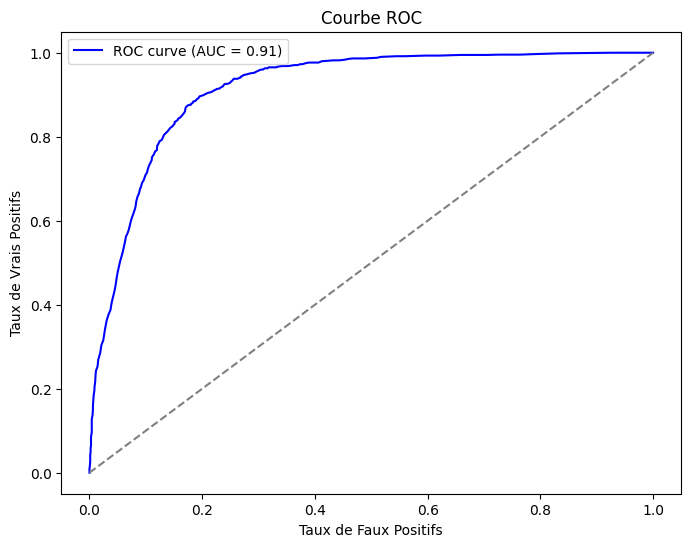

In [124]:

# Obtenir les probabilités des classes positives
y_probs = best_cl2.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Trouver le seuil optimal basé sur le meilleur F1-score
best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    y_pred_temp = (y_probs > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_temp)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Seuil optimal basé sur le F1-score : {best_threshold:.2f}")
print(f"Meilleur F1-score obtenu : {best_f1:.4f}")

# Reclassification avec le seuil optimal
y_pred_optimal = (y_probs > best_threshold).astype(int)

# Affichage du rapport de classification
print(classification_report(y_test, y_pred_optimal))

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()



Le modèle est performant, avec une bonne capacité de discrimination entre les classes.
L’Aire sous la courbe ROC (AUC) de 0.91 montre que le modèle fait bien la distinction entre les classes positives et négatives.

Le seuil optimal est de 0.45

#### Comparaison du modèle avant et après optimisation

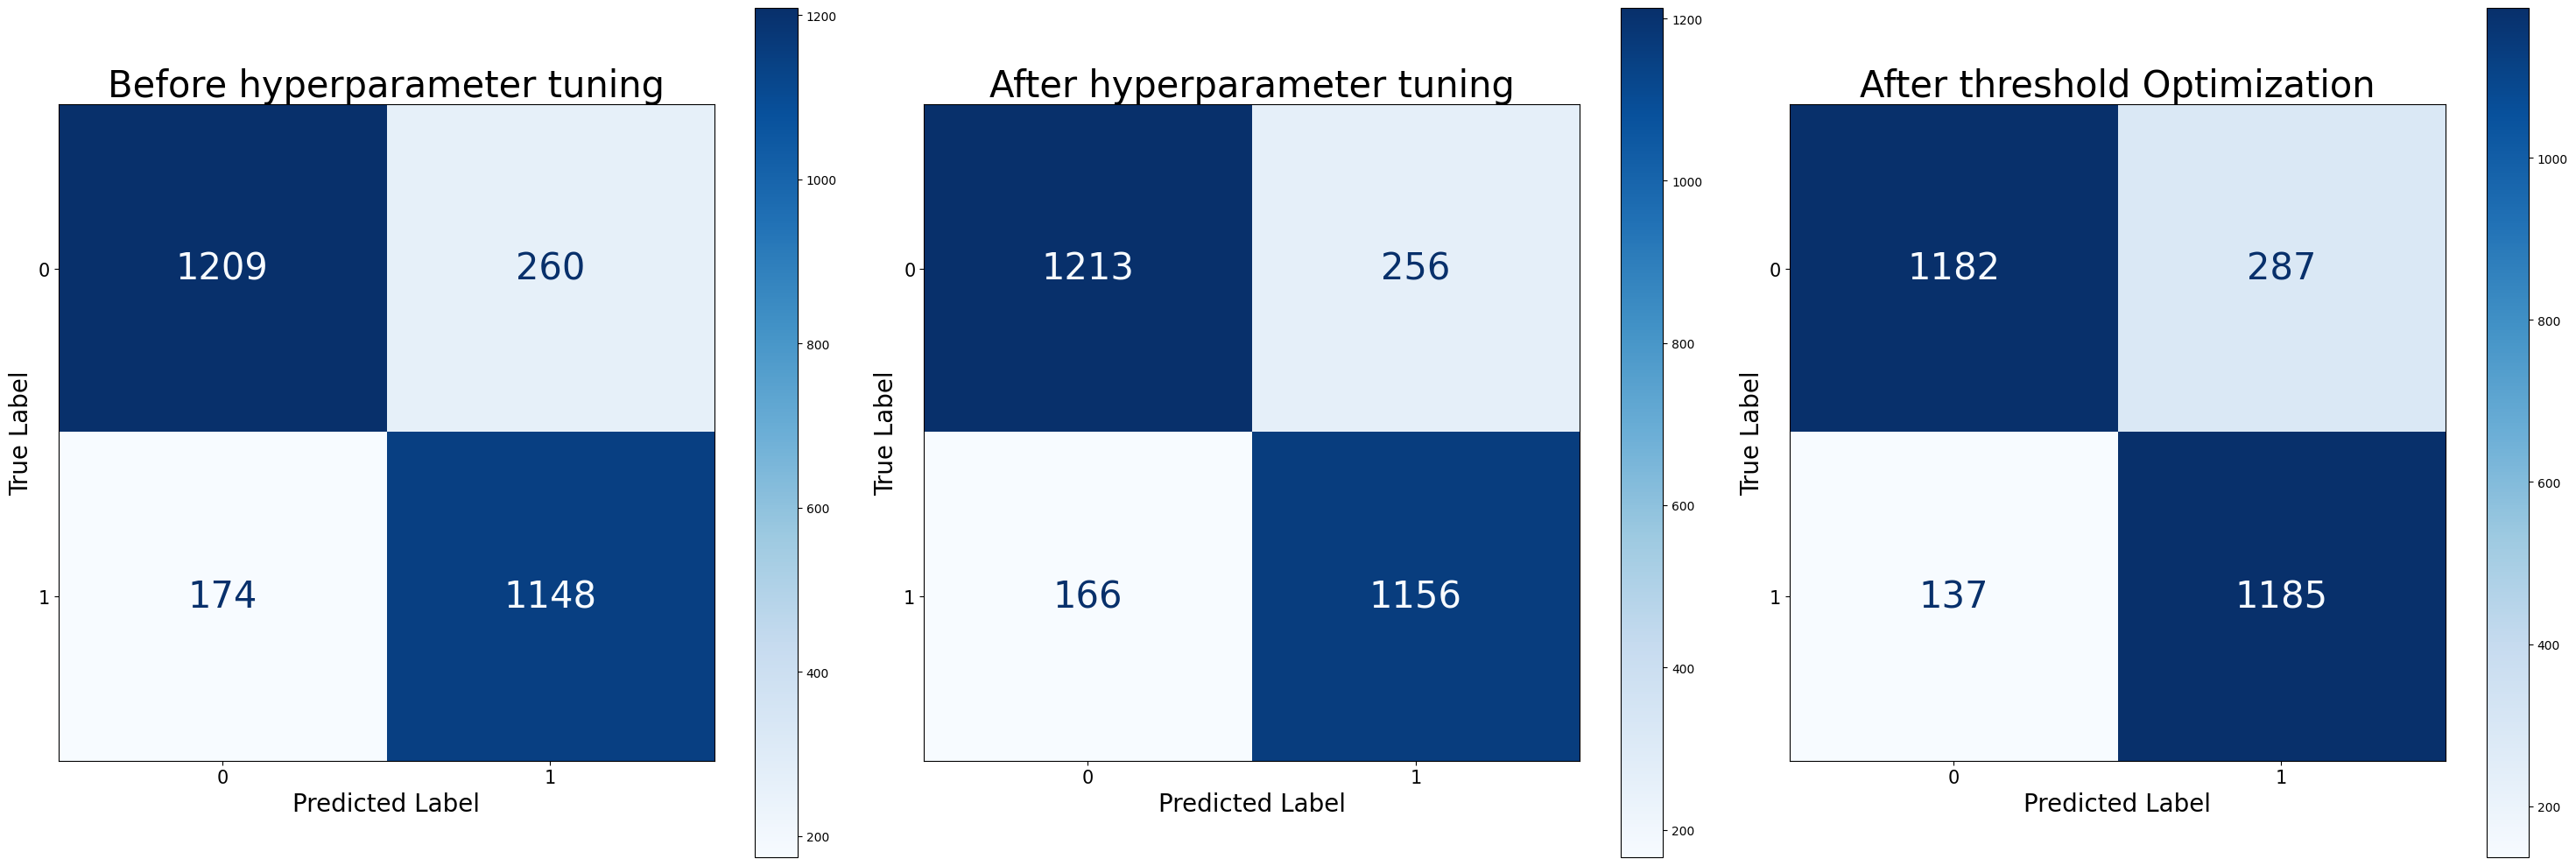

In [125]:
def final_confusion_matrix():                                           # Define function to create all confusion matrix
    # Set up a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    # Display the first confusion matrix
    disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_before))
    disp1.plot(ax=axes[0], cmap='Blues', text_kw={'size': 30})
    axes[0].set_xlabel('Predicted Label', fontsize=20)
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].set_ylabel('True Label', fontsize=20)
    axes[0].tick_params(axis='y', labelsize=15)
    axes[0].set_title('Before hyperparameter tuning', fontsize=30)

    # Display the second confusion matrix
    disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_afterGrid))
    disp2.plot(ax=axes[1], cmap='Blues', text_kw={'size': 30})
    axes[1].set_xlabel('Predicted Label', fontsize=20)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].set_ylabel('True Label', fontsize=20)
    axes[1].tick_params(axis='y', labelsize=15)
    axes[1].set_title('After hyperparameter tuning', fontsize=30)

    # Display the third confusion matrix
    disp3 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_optimal))
    disp3.plot(ax=axes[2], cmap='Blues', text_kw={'size': 30})
    axes[2].set_xlabel('Predicted Label', fontsize=20)
    axes[2].tick_params(axis='x', labelsize=15)
    axes[2].set_ylabel('True Label', fontsize=20)
    axes[2].tick_params(axis='y', labelsize=15)
    axes[2].set_title('After threshold Optimization', fontsize=30)

    plt.tight_layout()  # Ensure plots don't overlap
    plt.show()

final_confusion_matrix()

**Avant l'ajustement des hyperparamètres**

Vrais positifs (VP) : 1148

Faux positifs (FP) : 260

Vrais négatifs (VN) : 1209

Faux négatifs (FN) : 174

Interprétation :

Le modèle de base a une performance décente avec un bon équilibre entre la classe 0 et la classe 1.
Il a cependant 174 faux négatifs, ce qui signifie qu'il a raté plusieurs cas positifs et 260 faux positifs, ce qui peut être couteux pour la banque.

**Après l'ajustement des hyperparamètres**

VP : 1156 (↑ par rapport à avant)

FP : 256 (↓ légère amélioration)

VN : 1213 (↑ amélioration)

FN : 166 (↓ amélioration)

Interprétation :

L'ajustement des hyperparamètres a réduit les faux négatifs et les faux positifs, ce qui indique que le modèle est devenu plus précis.
Le nombre de vrais positifs a augmenté, ce qui est un bon signe.
L’amélioration est modérée mais notable.

**Après l'optimisation du seuil de décision**

VP : 1185 (↑ nette amélioration)

FP : 287 (↑ légère augmentation)

VN : 1182 (↓ légère diminution)

FN : 137 (↓ nette amélioration)

Interprétation :

Le modèle final est plus performant pour détecter les clients qui souscrivent à un compte à dépôt à terme.

🔹 L'optimisation du seuil améliore le F1-score en réduisant fortement les FN

🔹 Compromis : Une augmentation des FP mais qui reste acceptable pour minimiser les erreurs critiques (FN)

🔹 Meilleure capacité à capter les vrais clients potentiels, ce qui est essentiel dans un contexte métier



<Axes: xlabel='Variables'>

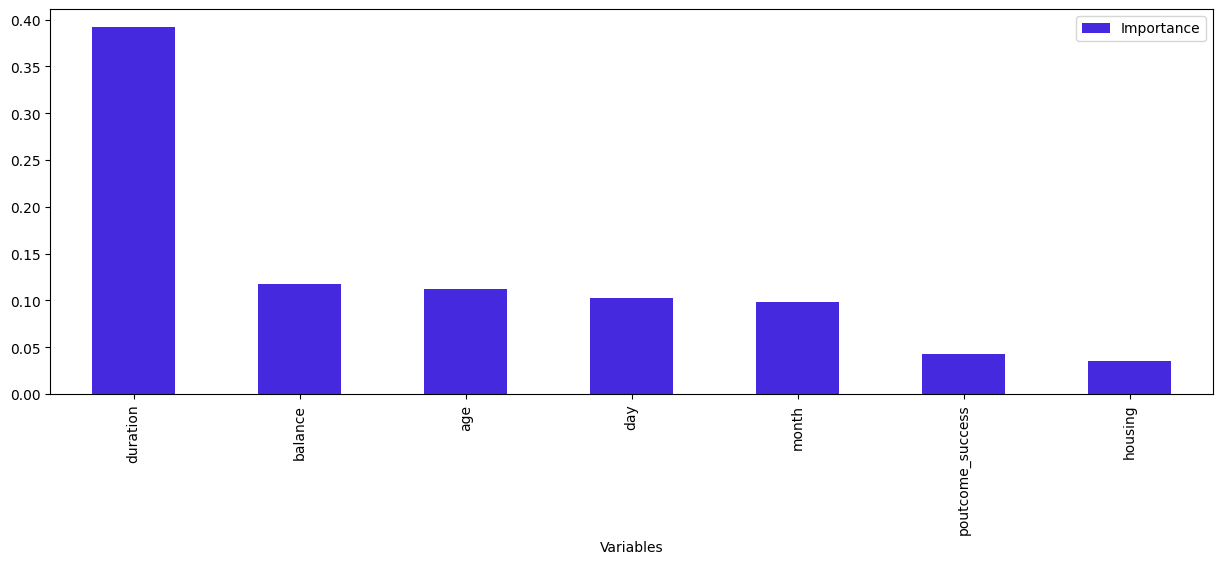

In [128]:
%matplotlib inline
final_columns = X_train.columns
feat_importances = pd.DataFrame({
    "Variables": final_columns,
    "Importance": best_cl2.feature_importances_
}).sort_values(by="Importance", ascending=False)
feat_importances.nlargest(7, "Importance").plot.bar(
    x="Variables",
    y="Importance",
    figsize=(15, 5),
    color="#4529de"
)

Notre modèle confirme les hypothèses lors de la partie exploration des données. La durée du dernier contact est informative mais doit être exclue en modélisation prédictive pour éviter une fuite d'information. Les campagnes en mai sont inefficaces, tandis que septembre et octobre sont plus favorables. Les 25 ans et moins et les 65 ans et plus sont plus enclins à souscrire, et les lundis/mardis sont les jours optimaux pour les contacts. Le solde du compte influence fortement la souscription, et les clients avec un prêt immobilier sont moins intéressés par un DAT.









**Sauvegarde du meilleur modèle**



In [130]:
import pickle

# Étape 1 : Entraîner uniquement sur X_train
final_model = best_cl2.fit(X_train, y_train)

# Sauvegarde du modèle dans un fichier
pickle.dump(final_model, open('FinalModel_BeforeThreshold.sav', 'wb'))

print("Modèle final sauvegardé avec succès !")

Modèle final sauvegardé avec succès !


**Pour charger le modèle plus tard**

In [ ]:
# Charger le modèle sauvegardé
#loaded_model = pickle.load(open('FinalModel_BeforeThreshold.sav', 'rb'))

# Faire des prédictions sur de nouvelles données
#y_pred = loaded_model.predict(X_test_new)  # X_test_new = nouvelles données test

#afficher les performances sur les nouvelles données
#print(classification_report(y_test, y_pred))

In [ ]:
#supposons un client